<div style="text-align: center;"> <h3>Exploratory Data Analysis</h3>
<h5>Formative Assessment 6</h5>
<h5>May 6, 2025</h5>    
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

### Task Overview:
You have a dataset containing the following features:

* Customer ID (Unique Identifier)

* Age (Continuous variable)

* Annual Income (Continuous variable, in thousands of dollars)

* Gender (Categorical: Male/Female)

* Product Category Purchased (Categorical: Electronics, Fashion, Home, Books, Others)

* Average Spend per Visit (Continuous variable, in dollars)

* Number of Visits in Last 6 Months (Discrete variable)

* Customer Segment (Categorical target variable: Budget Shopper, Regular Shopper, Premium Shopper)

The target variable, Customer Segment, has three categories:

* Budget Shopper (Low spenders)

* Regular Shopper (Moderate spenders)

* Premium Shopper (High spenders)

### Load
Import the dataset into R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_segmentation.csv")
print(df.shape)
df.head()

(10532, 8)


,Customer ID,Age,Annual Income (K$),Gender,Product Category Purchased,Average Spend per Visit ($),Number of Visits in Last 6 Months,Customer Segment
0,1,56,106,Female,Fashion,163.452764,16,Premium Shopper
1,2,69,66,Female,Home,163.020496,31,Budget Shopper
2,3,46,110,Male,Fashion,104.541284,29,Budget Shopper
3,4,32,50,Male,Electronics,110.064567,26,Regular Shopper
4,5,60,73,Female,Others,142.254559,38,Regular Shopper


Display summary statistics and variable types.

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        10532 non-null  int64  
 1   Age                                10532 non-null  int64  
 2   Annual Income (K$)                 10532 non-null  int64  
 3   Gender                             10532 non-null  object 
 4   Product Category Purchased         10532 non-null  object 
 5   Average Spend per Visit ($)        10532 non-null  float64
 6   Number of Visits in Last 6 Months  10532 non-null  int64  
 7   Customer Segment                   10532 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 658.4+ KB
None


,Customer ID,Age,Annual Income (K$),Average Spend per Visit ($),Number of Visits in Last 6 Months
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,5266.500000,43.593714,89.183726,104.296750,21.922237
std,3040.470852,14.904286,34.410760,54.611394,10.084682
min,1.000000,18.000000,30.000000,10.001052,5.000000
25%,2633.750000,31.000000,59.000000,56.706865,13.000000
50%,5266.500000,43.000000,89.000000,104.686601,22.000000
75%,7899.250000,56.000000,118.000000,150.885536,31.000000
max,10532.000000,69.000000,149.000000,199.959981,39.000000


## Exploration

In [4]:
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.rcParams['axes.facecolor'] = 'lightgrey'

### Missing Data

In [5]:
df.isna().sum().sum()

0

### Data type

In [6]:
df.dtypes

Customer ID                            int64
Age                                    int64
Annual Income (K$)                     int64
Gender                                object
Product Category Purchased            object
Average Spend per Visit ($)          float64
Number of Visits in Last 6 Months      int64
Customer Segment                      object
dtype: object

In [7]:
df.set_index("Customer ID", inplace=True)

In [8]:
df.nunique()

Age                                     52
Annual Income (K$)                     120
Gender                                   2
Product Category Purchased               5
Average Spend per Visit ($)          10532
Number of Visits in Last 6 Months       35
Customer Segment                         3
dtype: int64

#### Categorical

In [9]:
df.select_dtypes("object").agg(['unique', 'nunique']).T

,unique,nunique
Gender,"[Female, Male]",2
Product Category Purchased,"[Fashion, Home, Electronics, Others, Books]",5
Customer Segment,"[Premium Shopper, Budget Shopper, Regular Shop...",3


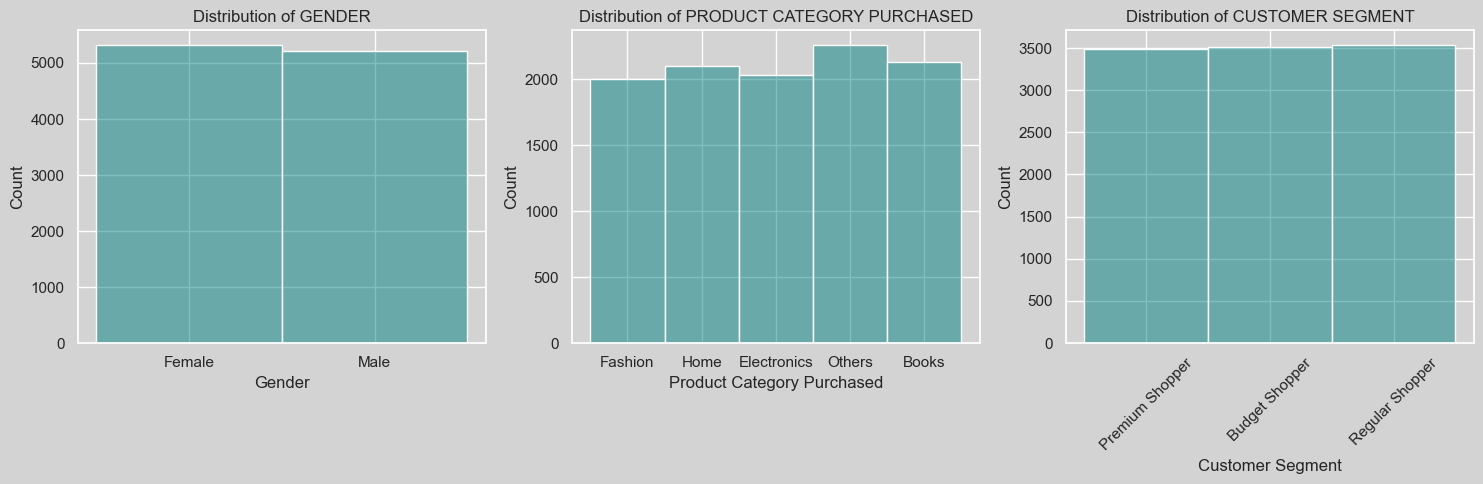

In [10]:
fig,ax = plt.subplots(ncols=3, figsize=(15,5))

for i, col in enumerate(df.select_dtypes("object")):
    sns.histplot(
        df[col],
        ax=ax[i],
        alpha=0.5,
        color="teal"
    )
    if i > 1:
        ax[i].tick_params(axis='x', labelrotation=45)

    ax[i].set_title(f"Distribution of {col.upper()}")

plt.tight_layout()

All are pretty evenly distributed including the traget variable that is `Customer Segment`.

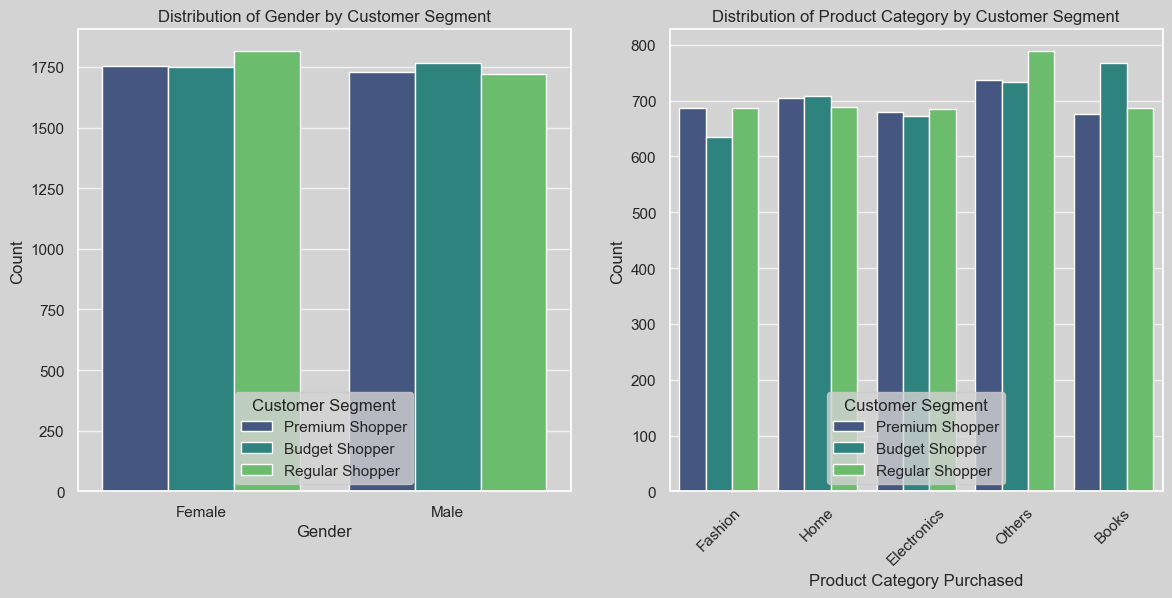

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(ax=axes[0], x='Gender', hue='Customer Segment', data=df, palette='viridis')
axes[0].set_title('Distribution of Gender by Customer Segment')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='-', alpha=0.7) 

sns.countplot(ax=axes[1], x='Product Category Purchased', hue='Customer Segment', data=df, palette='viridis')
axes[1].set_title('Distribution of Product Category by Customer Segment')
axes[1].set_xlabel('Product Category Purchased')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='-', alpha=0.7) 

axes[1].tick_params(axis='x', labelrotation=45)

axes[1].legend(title='Customer Segment', loc='lower center');

Even grouped by the response, both categorical variable are roughly evenly distributed.

### Continous

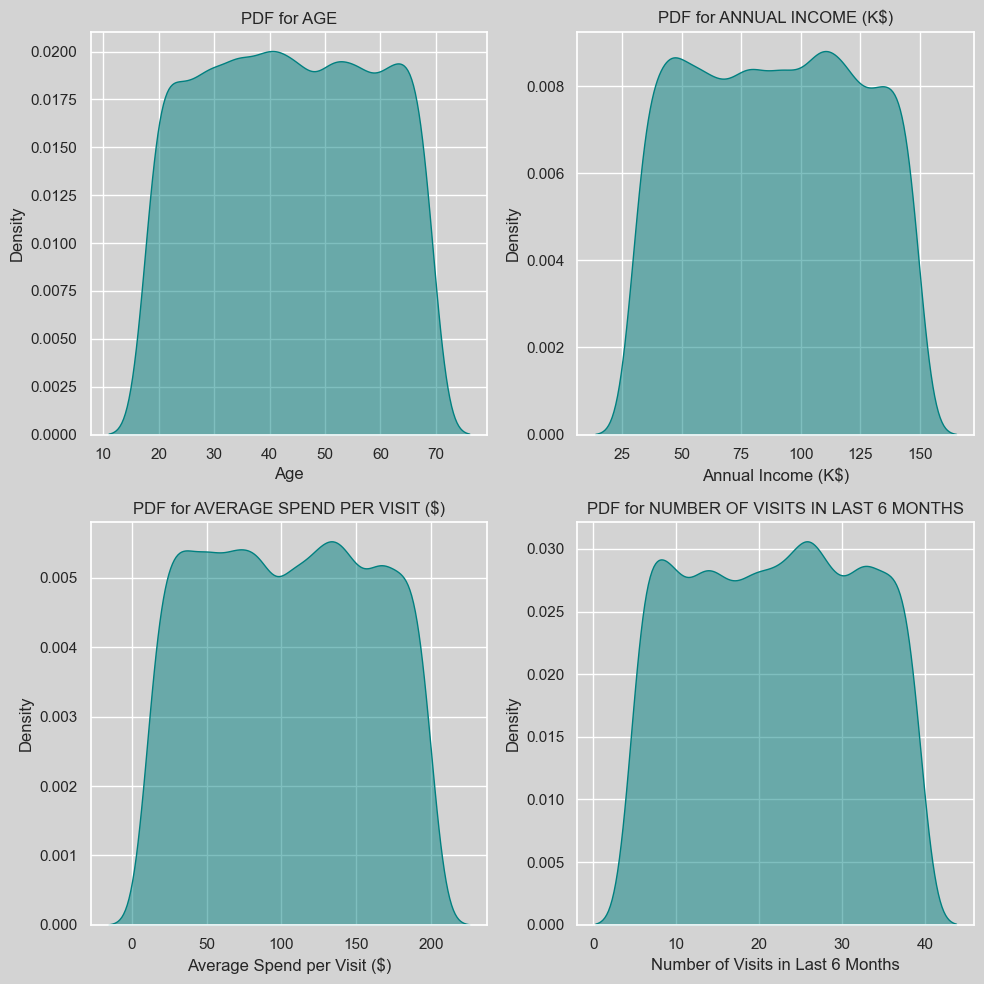

In [12]:
cols = df.select_dtypes("number").columns

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,10))

ax = ax.flatten()

for i,col in enumerate(cols):
    sns.kdeplot(
        df[col],
        fill=True,
        color="teal",
        alpha=0.5,
        ax = ax[i]
    )

    ax[i].set_title(f"PDF for {col.upper()}")

plt.tight_layout()


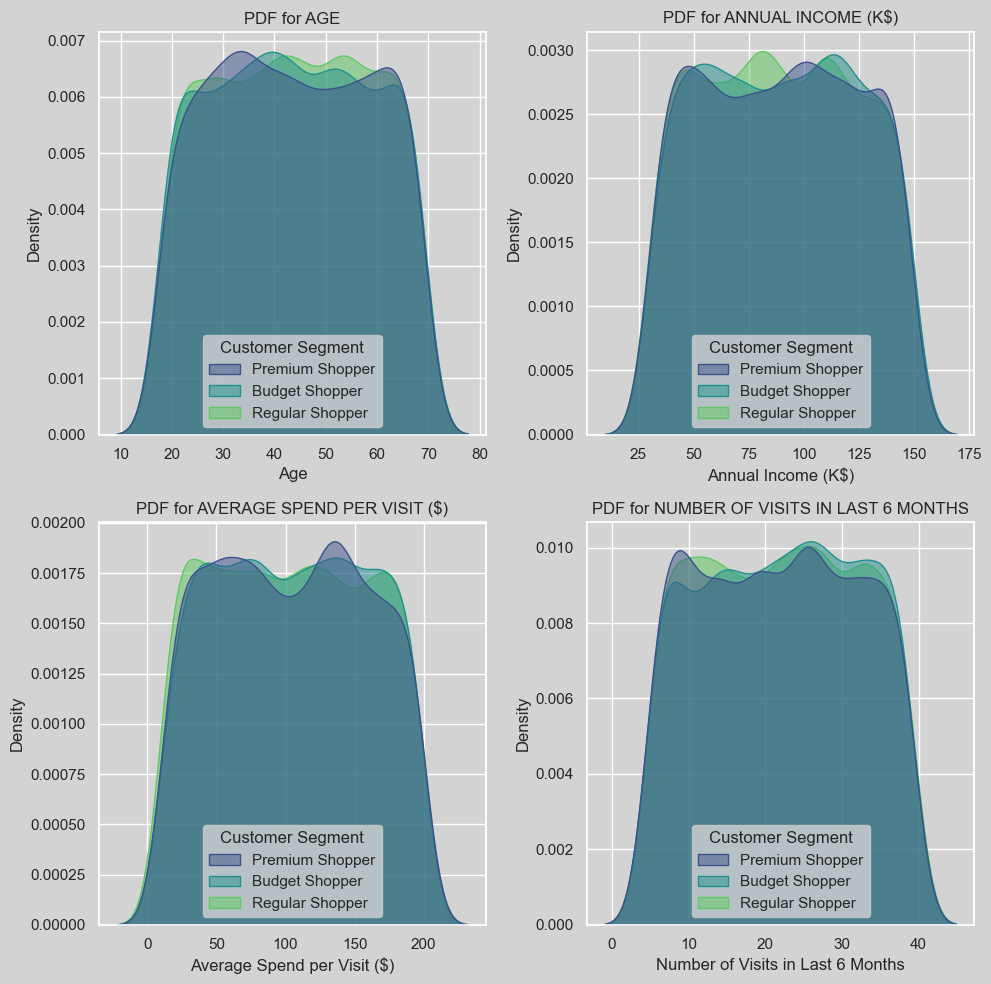

In [13]:
cols = df.select_dtypes("number").columns

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,10))

ax = ax.flatten()

for i,col in enumerate(cols):
    sns.kdeplot(
        df,
        x=col,
        fill=True,
        color="teal",
        alpha=0.5,
        ax = ax[i],
        hue="Customer Segment",
        palette="viridis"
    )

    ax[i].set_title(f"PDF for {col.upper()}")

plt.tight_layout()


The same is the case for the continous variables.

### Outliers

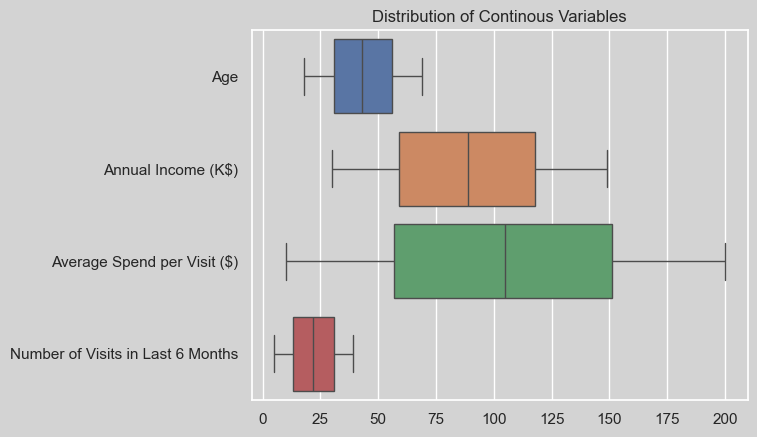

In [14]:
sns.boxplot(
    df[cols],
    orient="h"
)

plt.title("Distribution of Continous Variables");

### Correlation

In [15]:
df['IsMale'] = df["Gender"] == "Male"

mapping = {
    "Budget Shopper" : 0,
    "Regular Shopper" : 1,
    "Premium Shopper" : 2
}

df['Customer Segment Map'] = df['Customer Segment'].map(mapping)

prod_cat = pd.get_dummies(df['Product Category Purchased'], dtype=int, prefix="cat")

df_new = pd.concat([df, prod_cat], axis=1).drop(columns=["Product Category Purchased", "Customer Segment", "Gender"])

df_new.head()


,Age,Annual Income (K$),Average Spend per Visit ($),Number of Visits in Last 6 Months,IsMale,Customer Segment Map,cat_Books,cat_Electronics,cat_Fashion,cat_Home,cat_Others
Customer ID,,,,,,,,,,,
1,56,106,163.452764,16,False,2,0,0,1,0,0
2,69,66,163.020496,31,False,0,0,0,0,1,0
3,46,110,104.541284,29,True,0,0,0,1,0,0
4,32,50,110.064567,26,True,1,0,1,0,0,0
5,60,73,142.254559,38,False,1,0,0,0,0,1


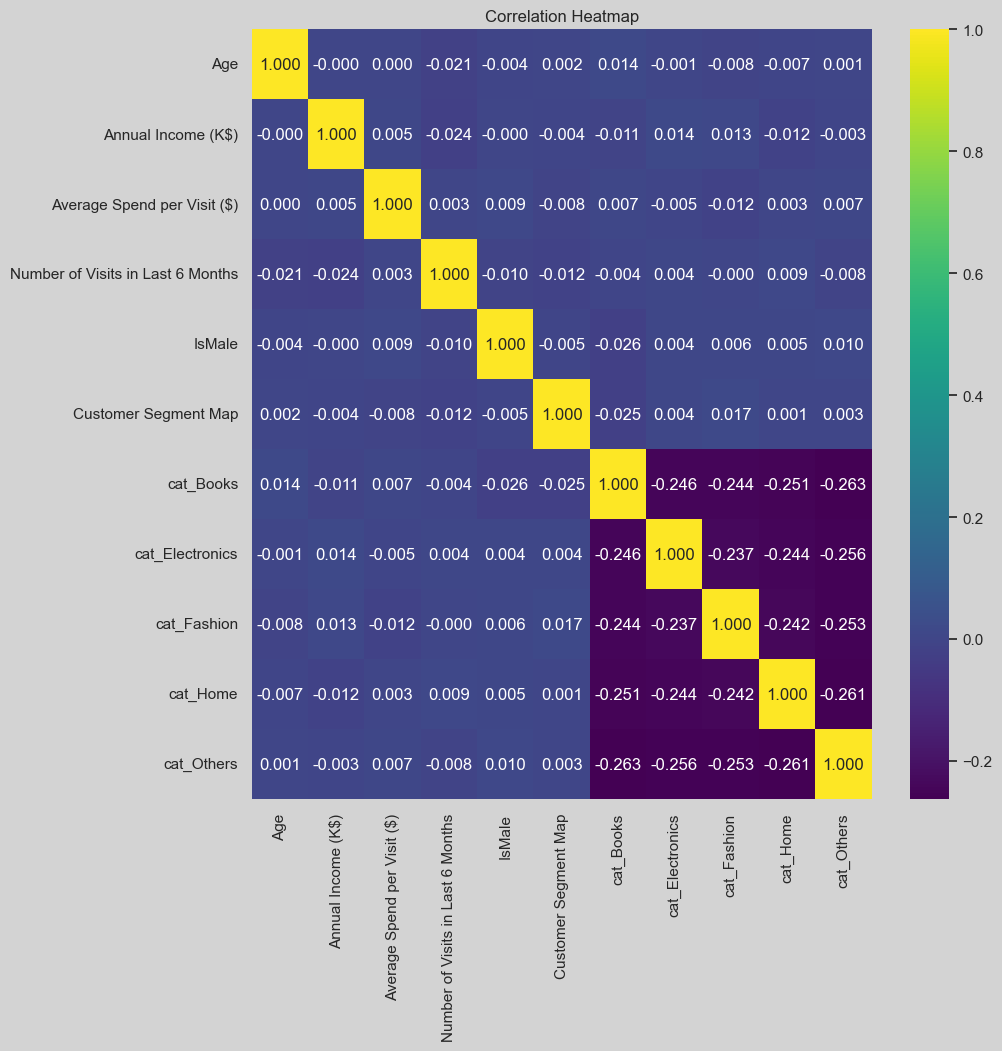

In [16]:
plt.figure(figsize=(10,10))

sns.heatmap(
    df_new.corr(),
    annot=True,
    cmap="viridis",
    fmt = ".3f"
)

plt.title("Correlation Heatmap");

Spend / Income

Frequent Visitors and HIgh Spenders

Cluster 
Age
Average Spend
Annual Income


This might be an issue because there's a low correlation between the predictors the response. Anyway, we don't have any multicollinearity.

In [17]:
ss = None

if ss == None:
    print("yes")

yes


In [18]:
from sklearn.preprocessing import StandardScaler


def wrangle(data, std_transformer=None):
    train_mode = std_transformer == None

    df_data = data.copy()

    is_male = (df_data["Gender"] == "Male").rename("IsMale").astype(int)

    mapping = {
        "Budget Shopper" : 0,
        "Regular Shopper" : 1,
        "Premium Shopper" : 2
    }

    cus_seg = df_data['Customer Segment'].map(mapping).rename("Customer Segment")

    prod_cat = pd.get_dummies(df_data['Product Category Purchased'], dtype=int, prefix="cat", drop_first=True)

    cons_vars = ['Age', 'Annual Income (K$)', 'Average Spend per Visit ($)', 'Number of Visits in Last 6 Months']
    if train_mode:
        std_transformer = StandardScaler()
        X_scaled = std_transformer.fit_transform(df_data[cons_vars])
    else:
        X_scaled = std_transformer.transform(df_data[cons_vars])

    X_scaled_df = pd.DataFrame(X_scaled, columns=cons_vars, index=df_data.index)

    df_new = pd.concat([cus_seg,X_scaled_df, is_male, prod_cat], axis=1)

    return df_new, std_transformer


Note that `drop_firs=True` in the one hot encoding part. This is needed to avoid perfect multicollinearity in the model fitting later (due to adding of constant). This is valid in a way that if customer is 0 for all the rest of the categories, he or she will automically be in the omitted category. 

## Split
Before making any modification to the data, let us split first to avoid any data leakage.

In [313]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("customer_segmentation.csv")

df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42
)

print("Train Set:", df_train.shape)
print("Test Set:", df_test.shape)

Train Set: (8425, 8)
Test Set: (2107, 8)


In [314]:
df_train_clean, transformer = wrangle(df_train)
print(df_train_clean.shape)

df_train_clean.columns

(8425, 10)


Index(['Customer Segment', 'Age', 'Annual Income (K$)',
       'Average Spend per Visit ($)', 'Number of Visits in Last 6 Months',
       'IsMale', 'cat_Electronics', 'cat_Fashion', 'cat_Home', 'cat_Others'],
      dtype='object')

In [315]:
df_test_clean, _ = wrangle(df_test, transformer)
print(df_test_clean.shape)
df_test_clean.columns

(2107, 10)


Index(['Customer Segment', 'Age', 'Annual Income (K$)',
       'Average Spend per Visit ($)', 'Number of Visits in Last 6 Months',
       'IsMale', 'cat_Electronics', 'cat_Fashion', 'cat_Home', 'cat_Others'],
      dtype='object')

## Baseline

In [326]:
class_count = df_test_clean['Customer Segment'].value_counts(normalize=True).sort_values(ascending=False)
class_count

Customer Segment
1    0.354533
2    0.335074
0    0.310394
Name: proportion, dtype: float64

In [327]:
baseline = class_count.iloc[0]
print("Majority Class will be the baseline:", baseline)

Majority Class will be the baseline: 0.35453251067869007


## Model Building

In [317]:
from sklearn.linear_model import LogisticRegression

response="Customer Segment"
y_train = df_train_clean[response]
X_train = df_train_clean.drop(columns=response)
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    penalty='l2', 
    C=1.0, 
    max_iter=1000 
)

model.fit(X_train, y_train)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)

accuracy_score(y_train, y_pred)

0.3534718100890208

That's not a good accuracy considering the baseline is also around 0.35.

In [319]:
from sklearn.model_selection import GridSearchCV


model = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    max_iter=1000
)

param_grid = [
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': [None]
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
     {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.2, 0.5, 0.8]
    },
    {
        'solver': ['saga'],
        'penalty': [None]
    }
]

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.3401780415430267


Still a horrible model!

## Model Evaluation

In [325]:
print("Baseline:", baseline)

Baseline: 0.35453251067869007


In [ ]:
y_pred = best_model.predict(X_train)

print("Train accuracy:",accuracy_score(y_train, y_pred))

Train accuracy: 0.3397032640949555


In [ ]:
y_test = df_test_clean[response]
X_test = df_test_clean.drop(columns=response)

y_pred = best_model.predict(X_test)

print("Test accuracy:",accuracy_score(y_test, y_pred))

Test accuracy: 0.3103939250118652


As we can see from the results, we would be better of with classifying everything as 1 or `Regular Shopper` since we would be right by about 35.45% of the time. This is better than the test accuracy of 31%.

In [349]:
from sklearn.metrics import log_loss
y_pred_proba = best_model.predict_proba(X_test)

logloss_score = log_loss(y_test, y_pred_proba)

print(f"Log Loss: {logloss_score}")

Log Loss: 1.0994688999518631


The log loss score just provides a quantitatiive basis that the model is performing **no better than random guessing**, or worse to some extent.

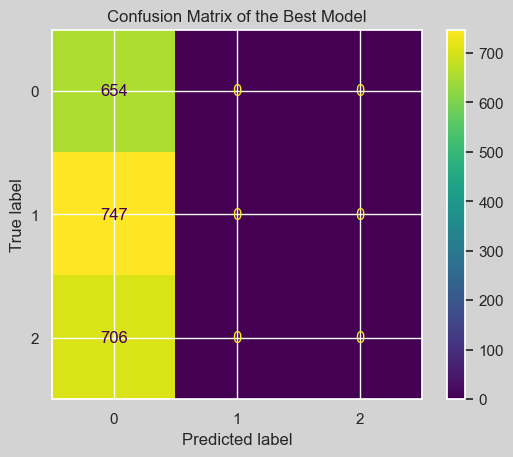

In [339]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title("Confusion Matrix of the Best Model");

According to the `Confusion Matrix of the Best Model`, everything was predicted as 0 or low spenders. This might be indicative of independence of the features to the response (which is obsevable by the `Correlational Heatmap` earlier).

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.31      1.00      0.47       654
           1       1.00      0.00      0.00       747
           2       1.00      0.00      0.00       706

    accuracy                           0.31      2107
   macro avg       0.77      0.33      0.16      2107
weighted avg       0.79      0.31      0.15      2107



This classification report indicates a *degenerate result* where the model is predicting only class 0 for every single sample.

*   **Recall for classes 1 and 2 is 0.00:** The model failed to correctly identify *any* instances of true class 1 or true class 2.
*   **Recall for class 0 is 1.00:** The model correctly identified *all* instances of true class 0.
*   **Precision for classes 1 and 2 is 1.00:** This is misleadingly high. It means that *when* the model predicted classes 1 or 2, it was always right. However, since the recall is 0, it means the model *never* predicted classes 1 or 2.
*   **Precision for class 0 is 0.31:** When the model predicted class 0 (which it does for every sample), it was correct only 31% of the time.
*   **Overall Accuracy is 0.31:** This matches the proportion of samples that are actually in class 0 (654 / 2107 ≈ 0.31), confirming that the model simply predicts class 0 universally.
* **The only respectable score here is the f1-score with 0.47**: meaning, the model has correctly identified all the class 0. But commen sense tells us that's not gonna cut it because everything was classified as 0 in the first place.

This result strongly suggests a fundamental problem with the model training or the features, as the model finds no signal to differentiate between class 0 and classes 1/2.

In [345]:
df_test_clean.columns

Index(['Customer Segment', 'Age', 'Annual Income (K$)',
       'Average Spend per Visit ($)', 'Number of Visits in Last 6 Months',
       'IsMale', 'cat_Electronics', 'cat_Fashion', 'cat_Home', 'cat_Others'],
      dtype='object')

In [344]:
from scipy.stats import chi2_contingency

cats = [ 'IsMale', 'cat_Electronics', 'cat_Fashion', 'cat_Home', 'cat_Others']
results = []
for col in cats:
    contingency_table = pd.crosstab(df_train_clean[col], df_train_clean['Customer Segment'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    results.append({
        "var" : col,
        "p-val" : p,
        "stats" : chi2,
        "is_independent" : p > 0.05
    })

pd.DataFrame(results)

,var,p-val,stats,is_independent
0,IsMale,0.147004,3.834596,True
1,cat_Electronics,0.935301,0.133774,True
2,cat_Fashion,0.344875,2.129147,True
3,cat_Home,0.606140,1.001287,True
4,cat_Others,0.466413,1.525368,True


In [346]:
from scipy.stats import kruskal
cols = ['Age', 'Annual Income (K$)',
       'Average Spend per Visit ($)', 
       'Number of Visits in Last 6 Months']
results = []
for col in cols:
    groups = [df_train_clean[df_train_clean[response] == seg][col] for seg in df_train_clean[response].unique()]
    kw_stat, p_kruskal = kruskal(*groups)
    results.append({
        "var" : col,
        "p-val" : p_kruskal,
        "stats" : kw_stat,
        "is_independent" : p > 0.05
    })

pd.DataFrame(results)

,var,p-val,stats,is_independent
0,Age,0.243288,2.827019,True
1,Annual Income (K$),0.752990,0.567408,True
2,Average Spend per Visit ($),0.404783,1.808810,True
3,Number of Visits in Last 6 Months,0.538345,1.238513,True


As we can see, both from chi-squere and kruskal test for independence, each feature is independent from the `Customer Segment`. This explain the horrible performance of the model.

In [362]:
best_model.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [360]:
pd.DataFrame(best_model.coef_.T, index=best_model.feature_names_in_)

,0,1,2
Age,0.000000,0.009454,0.0
Annual Income (K$),0.000000,0.000000,0.0
Average Spend per Visit ($),0.001077,0.000000,0.0
Number of Visits in Last 6 Months,0.000000,0.000000,0.0
IsMale,0.000000,0.000000,0.0
cat_Electronics,0.000000,0.000000,0.0
cat_Fashion,0.000000,0.000000,0.0
cat_Home,0.000000,0.000000,0.0
cat_Others,0.000000,0.000000,0.0


Besed on the feauture importance table above, all of the coeficients for 3 classes are 0. This means that *elasticnet* (which is an extension of both L1 and L2 regularization) found no useful linear relationship between the features and the response, except two predictors. Even then, they are still low and non-existend. No wonder the model predicted all the rows as 0 because no features will contribute to the calculations.

---

## Feature Engineering

### Age Grouping

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
ss = StandardScaler()

X_scaled = ss.fit_transform(X_train[['Age']])
X_scaled_df = pd.DataFrame(X_scaled, columns=["Age"])

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled_df)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))


In [27]:
intertia = np.array(inertia_errors)
mean_i = np.mean(intertia)
std_i = np.std(intertia)
stdz_i = (intertia - mean_i )/ std_i
stdz_i = stdz_i*-1

silhouette =   np.array(silhouette_scores)
mean_s = np.mean(silhouette)
std_s = np.std(silhouette)
stdz_s = (silhouette - mean_s )/ std_s

In [28]:
weight_inertia = 0.4
weight_silhouette = 0.6

combined_score = (weight_inertia * stdz_i) + (weight_silhouette * stdz_s)
result = pd.Series(combined_score).sort_values(ascending=False)
result.index = result.index + 2
result

2     0.361475
3     0.338148
4     0.266864
5     0.204830
6    -0.019824
11   -0.089687
9    -0.103560
12   -0.170199
7    -0.201579
8    -0.254271
10   -0.332197
dtype: float64

I think k=3 is more appropriate here for more granuality.

In [29]:
age_cluster = KMeans(n_clusters=3, random_state=42)
age_cluster.fit(X_scaled_df)
df_feat = df_train_clean.copy()
df_feat['age_cluster'] = age_cluster.labels_

### Average Spend Cluster

In [30]:
def cluster_this(X, col):
    n_clusters = range(2,13)
    inertia_errors = []
    silhouette_scores = []
    ss = StandardScaler()

    X_scaled = ss.fit_transform(X[[col]])
    X_scaled_df = pd.DataFrame(X_scaled, columns=[col])

    for k in n_clusters:
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X_scaled_df)
        inertia_errors.append(model.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, model.labels_))
    
    intertia = np.array(inertia_errors)
    mean_i = np.mean(intertia)
    std_i = np.std(intertia)
    stdz_i = (intertia - mean_i )/ std_i
    stdz_i = stdz_i*-1

    silhouette =   np.array(silhouette_scores)
    mean_s = np.mean(silhouette)
    std_s = np.std(silhouette)
    stdz_s = (silhouette - mean_s )/ std_s

    weight_inertia = 0.4
    weight_silhouette = 0.6

    combined_score = (weight_inertia * stdz_i) + (weight_silhouette * stdz_s)
    result = pd.Series(combined_score).sort_values(ascending=False)
    result.index = result.index + 2

    return result

In [31]:
cluster_this(X_train, "Average Spend per Visit ($)")

2     0.432346
4     0.349538
3     0.182226
5     0.067648
6    -0.033192
8    -0.055917
9    -0.088774
7    -0.095972
10   -0.178259
11   -0.286388
12   -0.293256
dtype: float64

We can choose k=4

In [32]:
def label_this(X, col, k):
    ss = StandardScaler()

    X_scaled = ss.fit_transform(X_train[[col]])
    X_scaled_df = pd.DataFrame(X_scaled, columns=[col])

    cluster_model = KMeans(n_clusters=k, random_state=42)
    cluster_model.fit(X_scaled_df)
    return cluster_model.labels_

In [33]:
df_feat['spend_cluster'] = label_this(X_train, "Average Spend per Visit ($)", k=4)

### Income

In [34]:
cluster_this(X_train, "Annual Income (K$)")

2     0.402144
3     0.305105
5     0.197796
4     0.196621
6     0.015347
7    -0.125152
9    -0.141712
8    -0.156708
10   -0.175433
12   -0.258901
11   -0.259108
dtype: float64

Let's choose k=3.

In [35]:
df_feat['income_cluster'] = label_this(X_train, "Annual Income (K$)", k=3)

In [163]:
cols = np.array(['age_cluster', 'spend_cluster', 'income_cluster'])

dummies = []
combinations = []
for col in cols:
    dum = pd.get_dummies(df_feat[col], prefix=col)
    dummies.append(dum)

for i, col in enumerate(cols):
    for j in range(len(cols)):
        if i == j:
            continue
        temp_dum_1 = dummies[i] # the first term
        temp_dum_2 = dummies[j] # the second tem

        for x, col_1 in enumerate(temp_dum_1.columns):
            for y, col_2 in enumerate(temp_dum_2.columns):
                name = f"{col_1}*{col_2}"
                mult = (temp_dum_1.iloc[:,x] * temp_dum_2.iloc[:,y]).rename(name)
                combinations.append(mult)

df_combinations = pd.concat(combinations, axis=1)
df_dummies = pd.concat(dummies, axis=1)

In [164]:
df_feat_fin = pd.concat([df_feat.drop(columns=cols), df_dummies,  df_combinations], axis=1)
df_feat_fin

,Customer Segment,Age,Annual Income (K$),Average Spend per Visit ($),Number of Visits in Last 6 Months,IsMale,cat_Electronics,cat_Fashion,cat_Home,cat_Others,...,income_cluster_0*spend_cluster_2,income_cluster_0*spend_cluster_3,income_cluster_1*spend_cluster_0,income_cluster_1*spend_cluster_1,income_cluster_1*spend_cluster_2,income_cluster_1*spend_cluster_3,income_cluster_2*spend_cluster_0,income_cluster_2*spend_cluster_1,income_cluster_2*spend_cluster_2,income_cluster_2*spend_cluster_3
1263,1,-0.579976,1.504988,-0.440189,1.490859,1,0,0,1,0,...,True,False,False,False,False,False,False,False,False,False
1618,0,1.236041,-0.178305,0.084677,-1.382147,1,0,0,1,0,...,False,False,False,False,False,False,True,False,False,False
8612,1,-1.454354,1.475966,0.260772,1.490859,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
5405,2,-1.118055,-0.323417,0.270115,-0.490525,0,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
9875,1,1.505080,1.534010,-1.077013,0.302029,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,1.034261,-0.004172,1.579004,0.401098,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
5191,0,0.361663,-0.787774,-1.041375,-0.787732,1,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
5390,2,-0.310936,-0.323417,-1.216592,0.896444,1,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
860,2,0.496182,-1.165064,-0.947127,0.995513,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


Spend / Income

Frequent Visitors and HIgh Spenders

In [165]:
df_feat_fin['spent/income'] = df_feat_fin['Average Spend per Visit ($)'] / df_feat_fin['Annual Income (K$)']

df_feat_fin['average_spent_last_6_months'] = df_feat_fin['Average Spend per Visit ($)'] * df_feat_fin['Number of Visits in Last 6 Months']

df_feat_fin['1_year_spending_proportion_phase'] = df_feat_fin['average_spent_last_6_months'] * 2 / df_feat_fin['Annual Income (K$)']

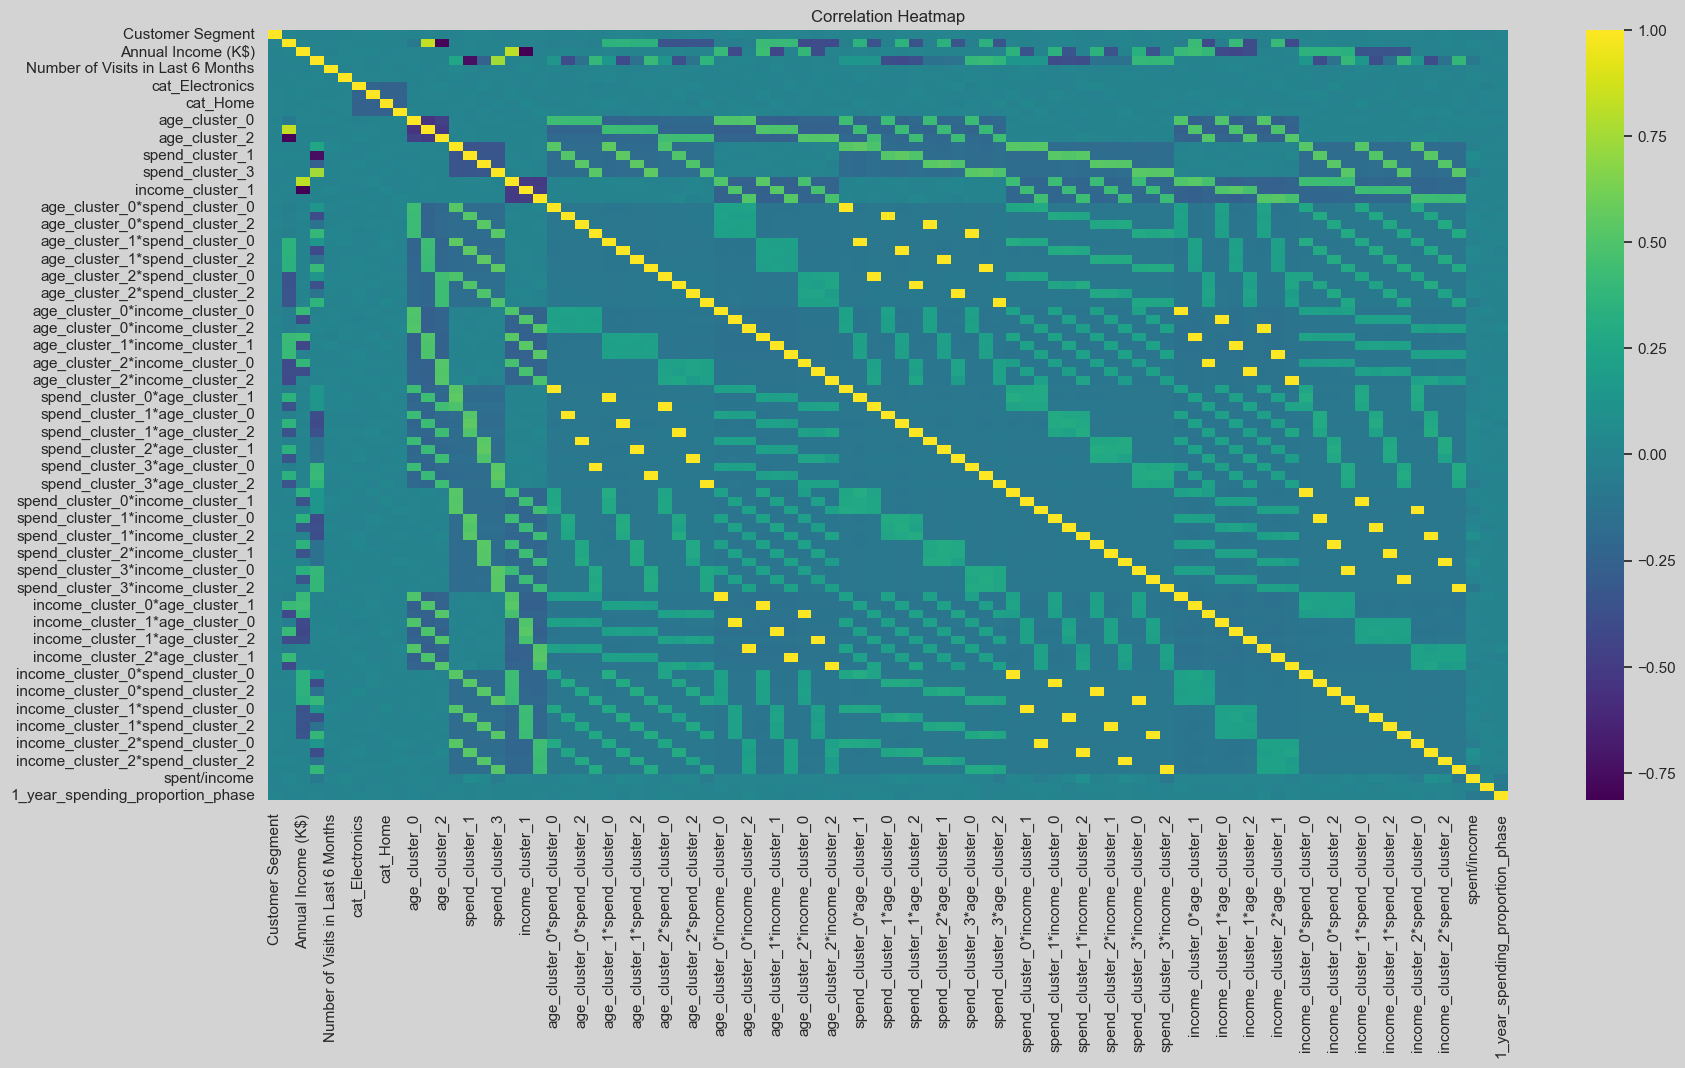

In [166]:
plt.figure(figsize=(20,10))

sns.heatmap(
    df_feat_fin.corr(),
    cmap="viridis"
)

plt.title("Correlation Heatmap");

In [188]:
response = "Customer Segment"
y_train = df_feat_fin[response]
X_train = df_feat_fin.drop(columns=response)

scaler_l1 = StandardScaler()
X_train_scaled_l1 = scaler_l1.fit_transform(X_train)

model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
model_l1.fit(X_train_scaled_l1, y_train)


coefficients_l1 = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model_l1.coef_[0]})
print(f"\nNumber of non-zero coefficients: {np.sum(model_l1.coef_[0] != 0)}")
coefs = coefficients_l1[coefficients_l1['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
coefs


Number of non-zero coefficients: 56


,Feature,Coefficient
0,income_cluster_0*age_cluster_0,5.182473e-02
1,average_spent_last_6_months,3.008032e-02
2,IsMale,2.699110e-02
3,Average Spend per Visit ($),2.663757e-02
4,income_cluster_0*spend_cluster_2,2.611614e-02
5,spent/income,2.530695e-02
6,Number of Visits in Last 6 Months,2.293341e-02
7,spend_cluster_1*income_cluster_2,1.580050e-02
8,income_cluster_0*spend_cluster_3,1.489077e-02
9,income_cluster_1*spend_cluster_0,1.443570e-02


In [189]:
cor = df_feat_fin[coefs.Feature].corr().stack().reset_index()
mask = (cor['level_0'] != cor['level_1']) & (cor[0] == 1)
cor[mask]

,level_0,level_1,0
16,income_cluster_0*age_cluster_0,age_cluster_0*income_cluster_0,1.0
236,income_cluster_0*spend_cluster_2,spend_cluster_2*income_cluster_0,1.0
402,spend_cluster_1*income_cluster_2,income_cluster_2*spend_cluster_1,1.0
468,income_cluster_0*spend_cluster_3,spend_cluster_3*income_cluster_0,1.0
515,income_cluster_1*spend_cluster_0,spend_cluster_0*income_cluster_1,1.0
567,income_cluster_2*spend_cluster_1,spend_cluster_1*income_cluster_2,1.0
625,spend_cluster_0*income_cluster_1,income_cluster_1*spend_cluster_0,1.0
676,spend_cluster_2*income_cluster_0,income_cluster_0*spend_cluster_2,1.0
746,age_cluster_2*income_cluster_1,income_cluster_1*age_cluster_2,1.0
805,age_cluster_2*spend_cluster_2,spend_cluster_2*age_cluster_2,1.0


In [260]:
coefs_rank = np.argsort(abs(coefs['Coefficient'].values))[::-1]
rank = coefs.iloc[coefs_rank].reset_index(drop=True)

In [264]:
rank = coefs.iloc[coefs_rank].reset_index(drop=True)
rank.head()

,Feature,Coefficient
0,cat_Fashion,-0.065828
1,cat_Others,-0.057571
2,income_cluster_0*age_cluster_0,0.051825
3,Annual Income (K$),-0.047036
4,cat_Home,-0.041385


In [220]:
def find_rank(X, rank):
    label_1 = X['level_0']
    label_2 = X['level_1']

    ranking_1 = rank[label_1 == rank['Feature']].index
    ranking_2 = rank[label_2 == rank['Feature']].index
    
    return ranking_1, ranking_2

In [255]:
mul_col = cor[mask].copy()

def find_rank(X, rank):
    label_1 = X['level_0']
    label_2 = X['level_1']

    ranking_1 = rank.index[rank['Feature'] == label_1].values[0]
    ranking_2 = rank.index[rank['Feature'] == label_2].values[0]
    
    return [ranking_1, ranking_2]

mul_col[["level_0_ranking", "level_1_ranking"]] = mul_col.apply(
    lambda X: find_rank(X, rank),
    axis=1,
    result_type='expand'
)

mul_col.head()


,level_0,level_1,0,level_0_ranking,level_1_ranking
16,income_cluster_0*age_cluster_0,age_cluster_0*income_cluster_0,1.0,2,32
236,income_cluster_0*spend_cluster_2,spend_cluster_2*income_cluster_0,1.0,11,25
402,spend_cluster_1*income_cluster_2,income_cluster_2*spend_cluster_1,1.0,17,21
468,income_cluster_0*spend_cluster_3,spend_cluster_3*income_cluster_0,1.0,18,39
515,income_cluster_1*spend_cluster_0,spend_cluster_0*income_cluster_1,1.0,19,23


In [256]:
del mul_col[0]

In [257]:
len(mul_col) - mul_col['level_0_ranking'].nunique()

0

In [258]:
len(mul_col) - mul_col['level_1_ranking'].nunique()

0

All rankings are unique.

In [267]:
def lower_rank(X):
    if X['level_0_ranking'] <  X['level_1_ranking']: 
        return X['level_1']
    else:
        return X['level_0']
    

mul_col['to_drop'] = mul_col.apply(lambda X: lower_rank(X), axis=1)

In [284]:
no_mul_col =  df_feat_fin[coefs.Feature].drop(columns=mul_col['to_drop'].to_list())
print(no_mul_col.shape)

(8425, 35)


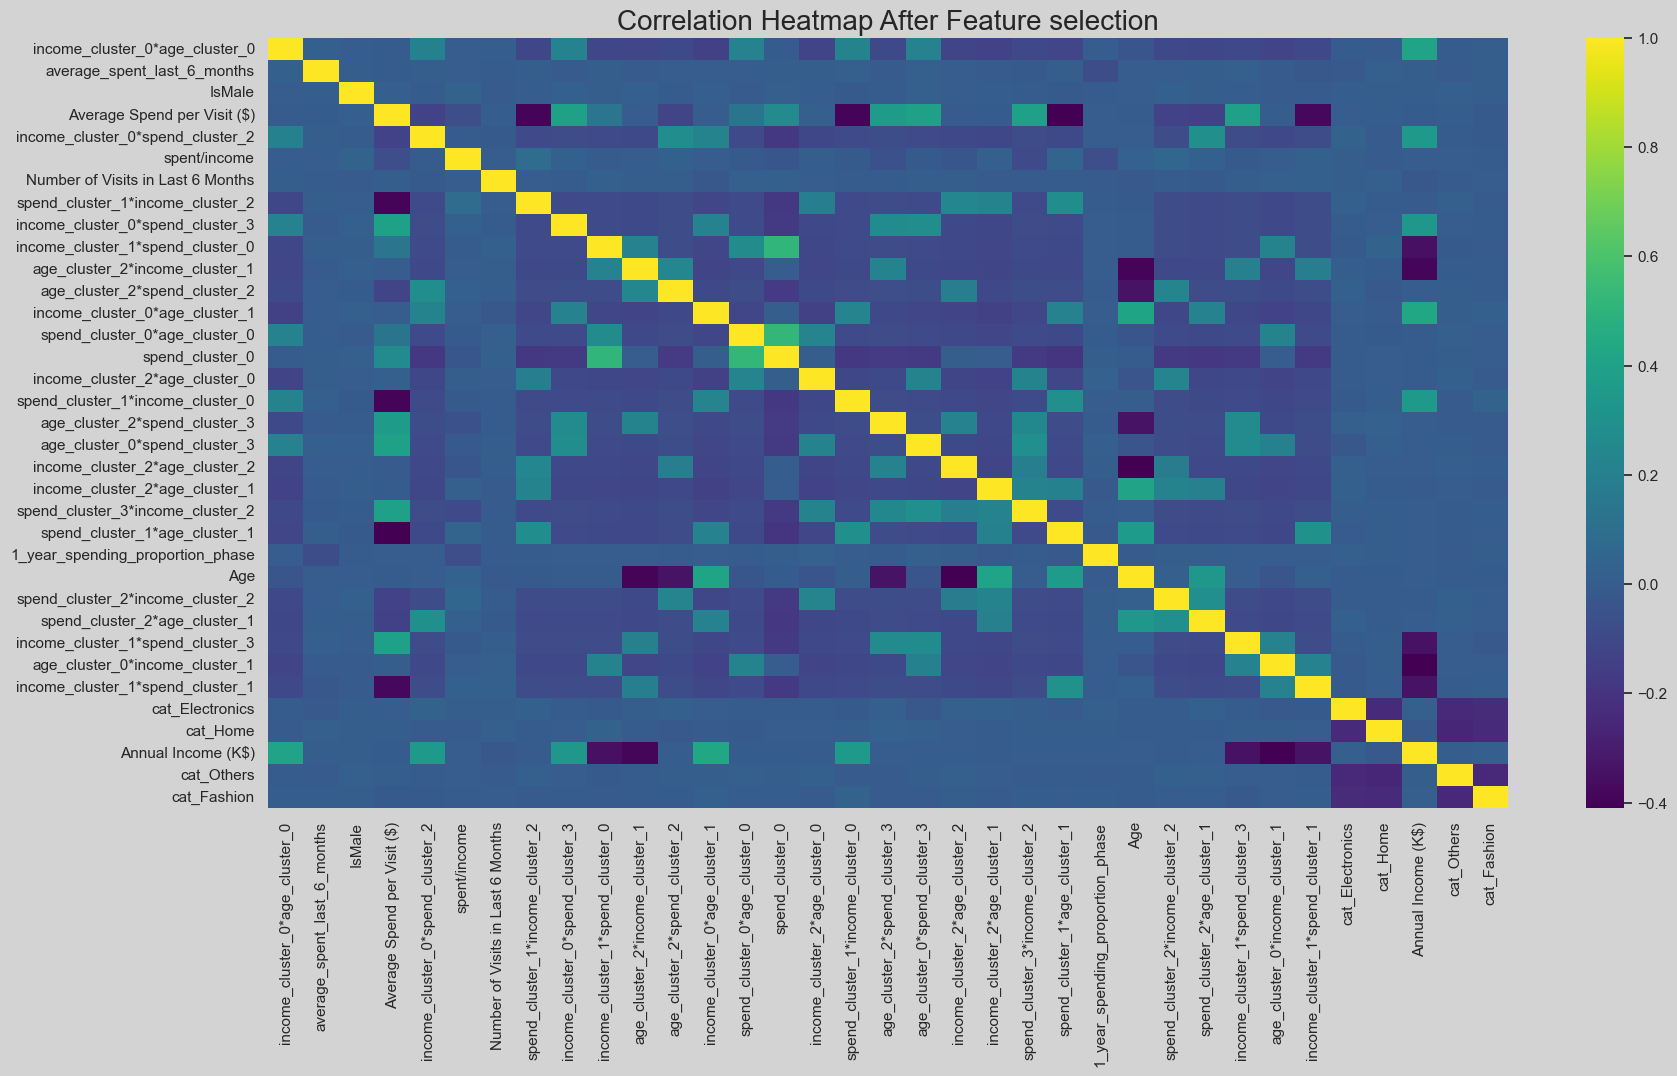

In [286]:
plt.figure(figsize=(20,10))

sns.heatmap(
    no_mul_col.corr(),
    cmap="viridis"
)

plt.title("Correlation Heatmap After Feature selection", size=20);

## Another Modeling

In [291]:
from sklearn.model_selection import GridSearchCV

X_train, y_train = no_mul_col, df_feat_fin[response]

model = LogisticRegression(max_iter=10000)

param_grid = [
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': [None]
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
     {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.2, 0.5, 0.8]
    },
    {
        'solver': ['saga'],
        'penalty': [None]
    }
]

grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 52 candidates, totalling 260 fits
{'C': 0.001, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.343620178041543


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X=X_train, y=y_train)
acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_train

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_train

1.0

In [299]:
pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)

Average Spend per Visit ($)          0.126519
average_spent_last_6_months          0.126157
spent/income                         0.124354
1_year_spending_proportion_phase     0.122897
Annual Income (K$)                   0.111042
Age                                  0.108446
Number of Visits in Last 6 Months    0.098233
IsMale                               0.024153
cat_Electronics                      0.017732
cat_Home                             0.017305
cat_Others                           0.017296
cat_Fashion                          0.016312
spend_cluster_0                      0.005942
income_cluster_2*age_cluster_0       0.005430
income_cluster_2*age_cluster_1       0.005382
income_cluster_2*age_cluster_2       0.005190
age_cluster_0*income_cluster_1       0.005102
income_cluster_0*age_cluster_1       0.004534
age_cluster_2*income_cluster_1       0.004486
income_cluster_0*age_cluster_0       0.004417
spend_cluster_0*age_cluster_0        0.003960
spend_cluster_1*age_cluster_1     

In [307]:
df_train_clean_add =  df_train_clean.copy()
df_train_clean_add['spent/income'] = df_train_clean_add['Average Spend per Visit ($)'] / df_train_clean_add['Annual Income (K$)']
df_train_clean_add['average_spent_last_6_months'] = df_train_clean_add['Average Spend per Visit ($)'] * df_train_clean_add['Number of Visits in Last 6 Months']
df_train_clean_add['1_year_spending_proportion_phase'] = df_train_clean_add['average_spent_last_6_months'] * 2 / df_train_clean_add['Annual Income (K$)']

X_train, y_train = df_train_clean_add.drop(columns=response), df_train_clean_add[response]

In [308]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X=X_train, y=y_train)
acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_train

1.0

In [309]:
df_test_clean_add =  df_test_clean.copy()
df_test_clean_add['spent/income'] = df_test_clean_add['Average Spend per Visit ($)'] / df_test_clean_add['Annual Income (K$)']
df_test_clean_add['average_spent_last_6_months'] = df_test_clean_add['Average Spend per Visit ($)'] * df_test_clean_add['Number of Visits in Last 6 Months']
df_test_clean_add['1_year_spending_proportion_phase'] = df_test_clean_add['average_spent_last_6_months'] * 2 / df_test_clean_add['Annual Income (K$)']

X_test, y_test = df_test_clean_add.drop(columns=response), df_test_clean_add[response]

In [310]:
acc_test = accuracy_score(y_test, clf.predict(X_test))
acc_test

0.32558139534883723

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True],
    'rf__criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search Complete.")

print("\nBest parameters found:")
print(grid_search.best_params_)

print("\nBest cross-validation score (on training data folds):")
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

test_score = best_model.score(X_test, y_test)
print(f"\nScore on the test set: {test_score:.4f}")

y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Starting Grid Search...
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Grid Search Complete.

Best parameters found:
{'rf__bootstrap': True, 'rf__criterion': 'entropy', 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}

Best cross-validation score (on training data folds):
0.338160237388724

Score on the test set: 0.3218

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.30      0.37      0.33       654
           1       0.33      0.29      0.31       747
           2       0.34      0.32      0.33       706

    accuracy                           0.32      2107
   macro avg       0.32      0.32      0.32      2107
weighted avg       0.32      0.32      0.32      2107



Even in random forest. There stil no luck. Nonetheless, let's report the intiatial model.

---

## Reporting

The logistic linear model did not brought forth any useful result given the limited dataset. The dataset was behaved and were approximately normal so there existed no necessity for strict transformation. This was also the case for all the distribution if grouped by the response variable, that is `Customer Segmentation`. The categorical variables was handled appropriately with `Gender` turned to `IsMale` for binary classification and `Product Category Purchased` one-hot encoded. The continous variable were all transformed by calculating their z-score for scaling reason. Then the data was split into two sets, train and test set with 80:20 ratio. An initial baseline was calculated using the normalized frequency of the majority class that is the class 1 or "Regular Spenders" with 0.354533. 

After all that, initial logistic model regression was trained that resulted to a train accuracy of approximately 0.3535. Which is simillar to baseline. Given that this was the training score, the test result will most likely be lower. So, it could be asserted that this was not a good model. Hyperparameter tuning was done to see if the results could be improved. The best model for the tuning brought worse results with an accuracy training score of 0.3397032640949555, test accuracy of 0.3103939250118652, and log loss of 1.0994688999518631. This implies that we were better off guessing class 1 all the time because then, we would be right 35.45% of the time. Confusion Matrix plot showed that the model predicted every row as class 0 or "Low Spenders" which reflected on the recall, precision, and f1-scores of each classification (with class 0 being the only one with scores that are not 0). 

In light of the terrible result, chi-square tests (for categorical) and Kruskal tests (for continous; it is nonparametric) was done against the response variable `Customer Segmentation`. As expected, every tests indicated that each features are independent of the response variable. This explained the lack of predictive power of the model and thus the terrible result that's not even better than guessing randomly. 

The feauture importance table showed the coeficients of each predictors for each modal. All but two are 0. Even the two that were not, are practically 0 themselves. This further supported the independence of features from response.

In an attempt to make the best out of the limited dataset, a feauture engineering was done. The following features was added:
* spend/income - spending of the customer raltive to their anual income
* average_spent_last_6_months - the name speaks for itself.
* 1_year_spending_proportion_phase - like the spend/income but in the context of a year.

The dataset was also clustered (using Kmeans) by the following variables: 
* Age - 3 clusters 
* Annual Income (K$) - 4 clusters 
* Average Spend per Visit ($) - 3 clusters

And then interaction features was added by multiplying each cluster of each the three column. Then multicorrelation was resolved by ranking their importance on another fitted logistic regression.

Even with all the features added, the results were no different than the simple ones. Even the hyperparameter tuning of a Random Forest brought simillar horrible results.

In conclusion, the independence of the features from the response ensued to a below the baseline model. This goes to show that if the dataset is trash, the model will also be garbage. Perhaps other features should be added. Features that are more related to the customer segmentation. Or perhaps the problem is in the customer segmentation itself. How do they even calculate for that in the first place? My recommendation is to scrap the response variable and conduct a cluster analysis based on the features. Upon doing so, it will brought about more natural groupings among the customers. 